In [26]:
import dmrg1 as dmrg1
import MPO_class as MPO
import MPS_class as MPS

import matplotlib.pyplot as plt
import numpy as np

plt.rc('text',usetex=True)

In [27]:
# Model parameters
L   = 128
h   = 1.
H   = MPO.IsingMPO(L, 1.)

chi = 256
engine = dmrg1.DMRG1(H)
engine.initialize(chi)

for i, chi in enumerate(chi_space):
    for n_steps in range(10):
        engine.dmrg_step()

C:\Users\asant\Documents\GitHub\DMRG\LanczosRoutines.py:38: RuntimeWarning: beta[0] ~= 0 encountered during Lanczos iteration.
  warnings.warn(


In [28]:
sigma_x = np.array([[0,1],[1,0]]).reshape(1,1,2,2)
sigma_z = np.array([[1,0],[0,-1]]).reshape(1,1,2,2)

Cxx = np.ones(L)
Czz = np.ones(L)

MPS_temp = MPS.MPS(L,10,2)
MPS_temp.M = engine.MPS.M.copy()

for j in np.arange(0,L):
    if j < L//2:
        MPS_temp.mix_normalize(j)
    if j == L/2:
        MPS_temp.mix_normalize(j)
    if j<L//2:
        Cxx[j] = MPO.ComputeCorrFunction(MPS_temp, j, L//2, sigma_x, sigma_x).real
        Czz[j] = MPO.ComputeCorrFunction(MPS_temp, j, L//2, sigma_z, sigma_z).real
    if j>L//2:
        Cxx[j] = MPO.ComputeCorrFunction(MPS_temp, L//2, j, sigma_x, sigma_x).real
        Czz[j] = MPO.ComputeCorrFunction(MPS_temp, L//2, j, sigma_z, sigma_z).real

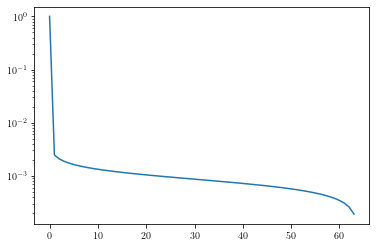

In [36]:
plt.plot(Cxx[L//2:])
plt.xscale('linear')
plt.yscale('log')